# Transfer Learning Using Inception V3 Keras

In [ ]:
!nvidia-smi

Sun May  5 02:33:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
%cd /content/drive/MyDrive/Cotton_DIsease_Project

/content/drive/MyDrive/Cotton_DIsease_Project


In [ ]:
%pwd

'/content/drive/MyDrive/Cotton_DIsease_Project'

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
from tensorflow import keras

In [ ]:
# import the libraries as show below

from tensorflow.keras.layers import Input, Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/Cotton_DIsease_Project/data/train'
valid_path = '/content/drive/MyDrive/Cotton_DIsease_Project/data/test'

In [ ]:
IMAGE_SIZE + [3]

[224, 224, 3]

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in inception.layers:
  #print(f'{layer.name} = {layer.trainable}')
  layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('data/train/*')

In [ ]:
folders

['data/train/fresh cotton leaf',
 'data/train/diseased cotton plant',
 'data/train/diseased cotton leaf',
 'data/train/fresh cotton plant']

In [ ]:
len(folders)

4

In [ ]:
# our layers - you can add more if you wan
print(inception.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")


In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders),activation ='softmax')(x)
## Creat a model object
model = Model(inputs = inception.input, outputs=prediction)

In [ ]:
# View The Structure Of Model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
# tell the model what cost and operation will be used

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1974 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-26-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
62/62 [==============================] - 1223s 20s/step - loss: 2.8854 - accuracy: 0.7391 - val_loss: 0.1231 - val_accuracy: 0.9444
Epoch 2/10
62/62 [==============================] - 40s 645ms/step - loss: 0.6596 - accuracy: 0.8825 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 3/10
62/62 [==============================] - 42s 677ms/step - loss: 0.5109 - accuracy: 0.9063 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/10
62/62 [==============================] - 41s 655ms/step - loss: 0.6014 - accuracy: 0.9078 - val_loss: 0.1470 - val_accuracy: 0.9444
Epoch 5/10
62/62 [==============================] - 40s 649ms/step - loss: 0.4629 - accuracy: 0.9245 - val_loss: 0.3158 - val_accuracy: 0.9444
Epoch 6/10
62/62 [==============================] - 42s 671ms/step - loss: 0.4910 - accuracy: 0.9235 - val_loss: 0.0616 - val_accuracy: 1.0000
Epoch 7/10
62/62 [==============================] - 42s 685ms/step - loss: 0.3542 - accuracy: 0.9422 - val_loss: 0.5440 - val_accuracy: 0.8333

In [ ]:
import pandas as pd
pd.DataFrame(r.history)

,loss,accuracy,val_loss,val_accuracy
0,2.885419,0.739108,0.123106,0.944444
1,0.659565,0.882472,0.036769,1.000000
2,0.510929,0.906282,0.001396,1.000000
3,0.601421,0.907801,0.147037,0.944444
4,0.462919,0.924519,0.315755,0.944444
5,0.490968,0.923506,0.061596,1.000000
6,0.354162,0.942249,0.543986,0.833333
7,0.327910,0.950861,1.745108,0.833333
8,0.373893,0.941236,0.126065,0.944444
9,0.601824,0.928571,0.000338,1.000000


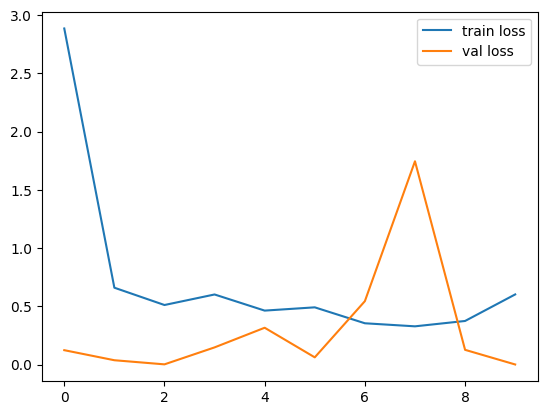

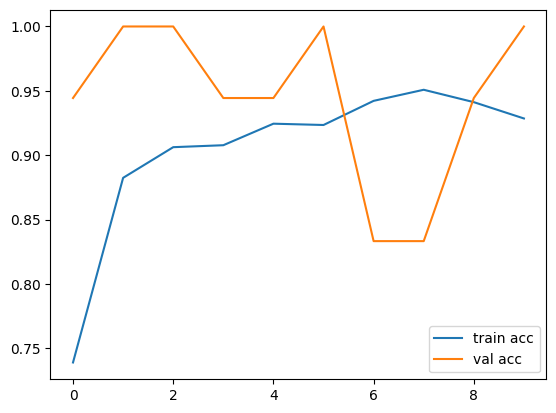

<Figure size 640x480 with 0 Axes>

In [ ]:

# plot the loss
def plot_hist(hist):
  plt.plot(hist['loss'], label='train loss')
  plt.plot(hist['val_loss'], label='val loss')
  plt.legend()
  plt.show()
  plt.savefig('LossVal_loss')

  # plot the accuracy
  plt.plot(hist['accuracy'], label='train acc')
  plt.plot(hist['val_accuracy'], label='val acc')
  plt.legend()
  plt.show()
  plt.savefig('AccVal_acc')

plot_hist(r.history)

In [ ]:
model.save("model/inceptionV3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
r

In [ ]:
y_pred = model.predict(test_set)

1/1 [==============================] - 3s 3s/step


In [ ]:
y_pred

array([[6.50554218e-29, 5.41176035e-25, 1.82232832e-26, 1.00000000e+00],
       [1.26160202e-07, 9.71590984e-04, 3.48373362e-07, 9.99027967e-01],
       [4.16638481e-15, 9.94966805e-01, 1.14281126e-10, 5.03315637e-03],
       [1.43703234e-21, 1.00000000e+00, 8.21377666e-21, 2.15330937e-15],
       [0.00000000e+00, 1.00000000e+00, 1.70511686e-31, 1.82163879e-20],
       [1.56182301e-16, 2.04260298e-09, 1.00000000e+00, 5.89310248e-19],
       [7.13210013e-18, 2.49355847e-09, 1.51505463e-14, 1.00000000e+00],
       [4.78124561e-15, 1.34141462e-10, 1.00000000e+00, 1.45214099e-08],
       [3.29486122e-22, 1.72692066e-32, 1.00000000e+00, 3.42823204e-29],
       [9.99969482e-01, 3.05382346e-05, 1.42359083e-14, 1.66847574e-13],
       [1.00000000e+00, 5.19184260e-27, 3.82998024e-18, 2.72210125e-22],
       [5.89874820e-34, 1.00000000e+00, 6.96950253e-37, 1.33475206e-38],
       [1.00000000e+00, 4.93286015e-18, 4.00352397e-18, 5.71976208e-22],
       [4.99113945e-11, 8.96952665e-14, 1.00000000e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 3, 1, 1, 1, 2, 3, 2, 2, 0, 0, 1, 0, 2, 1, 3, 2, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model("model/inceptionV3.h5")

In [ ]:
img=image.load_img('/content/drive/MyDrive/Cotton_DIsease_Project/data/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 137.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[0.9428049 , 0.02343382, 0.02033108, 0.01343029]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 25ms/step


In [ ]:
a==1

array([False])